# Introduction:
 This project is aimed at performing sentiment analysis on movie reviews. There are two techniques used here. It classifies the reviews into positive and negative sentiments. 

   - A word2vec model 
   - A Long Short Term Memory model
   
The similarity of words obtained by both models are analyzed and visualized using a plot. 

# Business value: 

With a large number of reviews received by an online business, it is almost impossible to go through each one of them to understand the customer sentiment. These reviews not only represent the overall impact on the user but also highlights the improvement opportunities. Instead of guessing the improvements to improve revenue, its any day better to get an idea of concrete issues from the users. It is also recommended to work on existing issues first before getting into developing new features. 

The sentiment analyzer developed in this project would help ingest large amount of reviews by classifying them into positive and negative reviews. This way the quantity of happy and unhappy users can be compared. It also filters the negative reviews so these will be the only ones that needs further analysis and contains the hints for further business improvement. 

# Concepts:

- word2vec: It is a natural language processing model that uses a corpus of text to learn association of words. Each word is represented by a vector which captures the semantics and qualities of that word. The similarity between words is gauged by the distance between these vectors in vector space. The closer the vectors, the similar the words in meaning/context. 

  The technique picks words falling in the mentioned window. For eg. in a window of size 5, 5 words before and 5 words after would be picked from the text. The frequency of words falling in the same window relates to their similarity in context.

- LSTM: It is a recurrent neural network model that has a capability to learn long term dependencies. A neural network is a combination of multiple logistic regression functions. An RNN learns the context and meaning of the word and creates embeddings. These embeddings are representation of word tokens.

 Here the classification has been done using already trained gensim embeddings as well as embeddings obtained by training an LSTM model. 


# Technologies Used: 
- Python
- Google Colab
- Tensorflow
- Long Short Term Memory
- word2vec
- Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import gensim
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt


In [ ]:
 data = pd.read_csv('IMDB.csv')

In [ ]:
data['review'] = data['review'].apply(lambda x: gensim.utils.simple_preprocess(x))
data['review'] = data['review'].apply(lambda x: [word for word in x if word not in gensim.parsing.preprocessing.STOPWORDS])
train_data, test_data, train_labels, test_labels = train_test_split(data['review'], data['sentiment'], test_size=0.2)


## Applying word2vec model. 
word2vec performs better with little to no pre-processing as the words change after processing. For eg. a word such as "eating" will become "eat" post stemming. The model may fail to capture the original context of such word. I have applied simple preprocessing in this case and also removed the stopwords. Stopwords are words such as is, an, a.


In [ ]:

data['review'] = data['review'].apply(lambda x: gensim.utils.simple_preprocess(x))
data['review'] = data['review'].apply(lambda x: [word for word in x if word not in gensim.parsing.preprocessing.STOPWORDS])

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data['review'], data['sentiment'], test_size=0.2)

# Train the Word2Vec model
model = Word2Vec(train_data, vector_size=100, window=5, min_count=5, sg=1)

# Average the word embeddings for each review
def get_review_vector(review):
    vectors = []
    for word in review:
        if word in model.wv.key_to_index:
            vectors.append(model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros((100,))

train_vectors = np.array([get_review_vector(review) for review in train_data])
test_vectors = np.array([get_review_vector(review) for review in test_data])

logreg = LogisticRegression()
logreg.fit(train_vectors, train_labels)

# Evaluate the model
train_accuracy = logreg.score(train_vectors, train_labels)
test_accuracy = logreg.score(test_vectors, test_labels)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.873525
Test accuracy: 0.8786


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 The model has a test accuracy of 87% and hence can be used for classifying text by using a output vector dimension of 100. Now, the model accuracy is calculated and compared with dimnsions 25,50,100 and 150.

 Changing the size defines the output vector dimension. If the size is 100 that means we are trying to compress the embeddings/features of words to 100 dimensions.This will lead to more focused features of the words to be highlighted.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

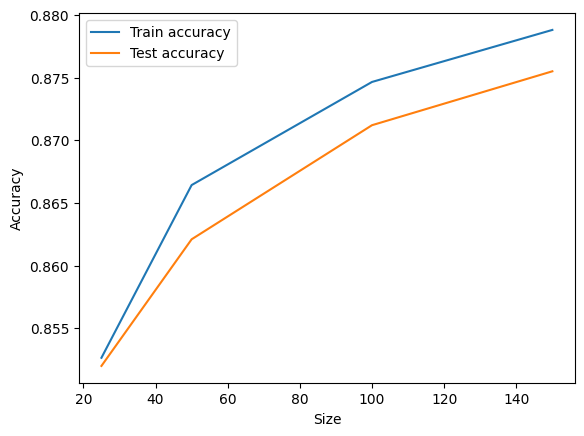

In [ ]:
size_values = [25, 50, 100, 150]

# Train and evaluate logistic regression models with different size values
train_accuracies = []
test_accuracies = []

for size in size_values:
    model = Word2Vec(train_data, vector_size=size, window=5, min_count=5, sg=1)

    # Average the word embeddings for each review
    train_vectors = np.array([get_review_vector(review) for review in train_data])
    test_vectors = np.array([get_review_vector(review) for review in test_data])

    logreg = LogisticRegression()
    logreg.fit(train_vectors, train_labels)

    train_accuracy = logreg.score(train_vectors, train_labels)
    test_accuracy = logreg.score(test_vectors, test_labels)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results of changing vector sizes
plt.plot(size_values, train_accuracies, label='Train accuracy')
plt.plot(size_values, test_accuracies, label='Test accuracy')
plt.xlabel('Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




As per the graph the test accuracy increased for first few vectors but started to increase less with increasing number.This means first few features hold the most information and the percentage decrease as we further increase the vector size. 

 Now, we are comparing the model accuracy with different window size. The vector size is kept 100 and window size varies between 2,3,5, and 10. Smaller window means the relationships between words in a review are more local in nature. 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

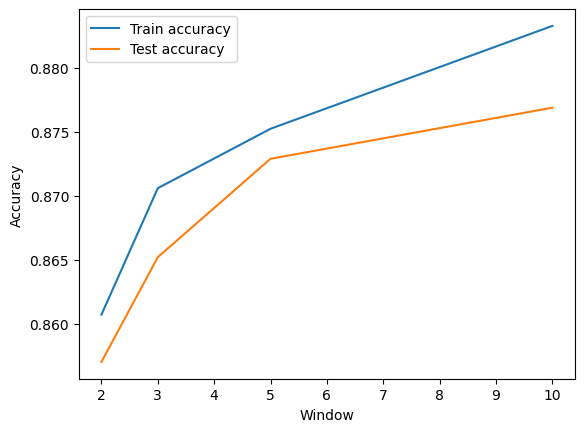

In [ ]:
window_values = [2, 3, 5, 10]

# Train and evaluate logistic regression models with different window values
train_accuracies = []
test_accuracies = []

for window in window_values:
    model = Word2Vec(train_data, vector_size=100, window=window, min_count=5, sg=1)

    train_vectors = np.array([get_review_vector(review) for review in train_data])
    test_vectors = np.array([get_review_vector(review) for review in test_data])

    logreg = LogisticRegression()
    logreg.fit(train_vectors, train_labels)

    train_accuracy = logreg.score(train_vectors, train_labels)
    test_accuracy = logreg.score(test_vectors, test_labels)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(window_values, train_accuracies, label='Train accuracy')
plt.plot(window_values, test_accuracies, label='Test accuracy')
plt.xlabel('Window')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 




 The accuracy of train and test both decreases as window is decreasing. The test accuracy is lower than train as seen in the plot. The increase in accuracy is not as dramatic after 5 windows. This means 5 words before and after a certain word explain the most features. As the window size increases, the feature context doesn't increase at the same rate. 



## Applying LSTM RNN 
 RNNs are used for NLP as they can capture the sequential patterns. The words have a lot of meaning associated with them based on the context or surrounding words. RNN captures that context and filters features based on the most explained context. They can store data for a long time and store context. They can better provide similarity between words and can compress features into specified dimension.

 Here we are comparing the performance of word2vec as well as an RNN model.The RNN model is trained on the data to get embeddings which are used for prediction.

Training a word2vec with vector size as 300

In [ ]:
# Train the Word2Vec model
model_w2v = Word2Vec(train_data, vector_size=300, window=5, min_count=5, sg=1)

# Average the word embeddings for each review
def get_review_vector(review):
    vectors = []
    for word in review:
        if word in model_w2v.wv.key_to_index:
            vectors.append(model_w2v.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros((100,))

train_vectors = np.array([get_review_vector(review) for review in train_data])
test_vectors = np.array([get_review_vector(review) for review in test_data])

logreg = LogisticRegression()
logreg.fit(train_vectors, train_labels)

# Evaluate the model
train_accuracy = logreg.score(train_vectors, train_labels)
test_accuracy = logreg.score(test_vectors, test_labels)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.882625
Test accuracy: 0.8821


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
X = data['review']
y = data['sentiment']
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(5000, 300, input_length=X.shape[1]))
model_rnn.add(LSTM(300))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit RNN model
model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate RNN model
train_acc = model_rnn.evaluate(X_train, y_train)[1]
test_acc = model_rnn.evaluate(X_test, y_test)[1]
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)




Epoch 1/10
625/625 [==============================] - 96s 141ms/step - loss: 0.3700 - accuracy: 0.8367 - val_loss: 0.2964 - val_accuracy: 0.8760
Epoch 2/10
625/625 [==============================] - 39s 62ms/step - loss: 0.2531 - accuracy: 0.9003 - val_loss: 0.2907 - val_accuracy: 0.8804
Epoch 3/10
625/625 [==============================] - 27s 44ms/step - loss: 0.2080 - accuracy: 0.9189 - val_loss: 0.3183 - val_accuracy: 0.8730
Epoch 4/10
625/625 [==============================] - 24s 38ms/step - loss: 0.1620 - accuracy: 0.9396 - val_loss: 0.3383 - val_accuracy: 0.8694
Epoch 5/10
625/625 [==============================] - 22s 36ms/step - loss: 0.1366 - accuracy: 0.9510 - val_loss: 0.3770 - val_accuracy: 0.8610
Epoch 6/10
625/625 [==============================] - 23s 37ms/step - loss: 0.1005 - accuracy: 0.9642 - val_loss: 0.4616 - val_accuracy: 0.8626
Epoch 7/10
625/625 [==============================] - 20s 32ms/step - loss: 0.0799 - accuracy: 0.9731 - val_loss: 0.4892 - val_accuracy

The performance for word2vec is better than RNN. Test accuracy of
- word2vec= 88%
- RNN= 86%


Now, we are going to compare the performance of RNN using embeddings from word2vec as well as pre-trained glove embeddings.

Training a LSTM model using the embeddings from word2vec model

In [ ]:

data = pd.read_csv('IMDB.csv')
data['review'] = data['review'].apply(lambda x: gensim.utils.simple_preprocess(x))
data['review'] = data['review'].apply(lambda x: [word for word in x if word not in gensim.parsing.preprocessing.STOPWORDS])
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

X = data['review']
y = data['sentiment']

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data['review'], data['sentiment'], test_size=0.2)

# Train the Word2Vec model
model_final_w2v = Word2Vec(train_data, vector_size=100, window=5, min_count=5, sg=1)

# Retrieve embeddings for each word of the review
embedding_matrix = np.zeros((len(X), model_final_w2v.vector_size))
for i, word in enumerate(model_final_w2v.wv.key_to_index):
  embedding_matrix[i]=(model_final_w2v.wv[word])


#Defining model architecture
model = Sequential()
model.add(Embedding(len(X), 300, input_length=200))
model.add(LSTM(300))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy']) 
model.layers[0].set_weights=[embedding_matrix]
model.layers[0].trainable=False

#Getting data ready for LSTM
tokenizer = Tokenizer(num_words=len(X))
word_index=tokenizer.word_index
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200) #Getting 100 words from reviews
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w2v_word_index=tokenizer.word_index


#Train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
train_acc = model.evaluate(X_train, y_train)[1]
test_acc = model.evaluate(X_test, y_test)[1]
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)




Epoch 1/10
1250/1250 [==============================] - 31s 19ms/step - loss: 0.6660 - accuracy: 0.6005 - val_loss: 0.5937 - val_accuracy: 0.6799
Epoch 2/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.5841 - accuracy: 0.6877 - val_loss: 0.5421 - val_accuracy: 0.7299
Epoch 3/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.5413 - accuracy: 0.7259 - val_loss: 0.5018 - val_accuracy: 0.7562
Epoch 4/10
1250/1250 [==============================] - 23s 19ms/step - loss: 0.4983 - accuracy: 0.7569 - val_loss: 0.4883 - val_accuracy: 0.7664
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.4691 - accuracy: 0.7764 - val_loss: 0.4538 - val_accuracy: 0.7879
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.4445 - accuracy: 0.7928 - val_loss: 0.4504 - val_accuracy: 0.7882
Epoch 7/10
1250/1250 [==============================] - 23s 19ms/step - loss: 0.4194 - accuracy: 0.8052 - val_loss: 0.4277 -

 The accuracy from trained model is 81%.

 Now the pre-trained embeddings are used to capture the context of words.






In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [ ]:
#Getting the train and test data ready
data = pd.read_csv('IMDB.csv')

data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
X = data['review']
y = data['sentiment']
tokenizer_trained = Tokenizer(num_words=len(X))
word_index=tokenizer_trained.word_index
tokenizer_trained.fit_on_texts(X)
X = tokenizer_trained.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200) #Getting 100 words from reviews

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Reading the embeddings
embedding_path = '/content/glove.6B.300d.txt'
embedding_index = {}
with open(embedding_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


#Creating matrix of embeddings
embedding_matrix = np.zeros((len(X), 300)) #Each word is represented by 300 vectors
for word, i in tokenizer_trained.word_index.items():
    embedding_vector = embedding_index.get(word)
    if i<len(X):
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#We have the corresponsing vectors of all words from IMDB corpus


#Defining model architecture
model_embeddings = Sequential()
model_embeddings.add(Embedding(len(X), 300, input_length=200))
model_embeddings.add(LSTM(300))
model_embeddings.add(Dense(1, activation = 'sigmoid'))
model_embeddings.compile(loss = 'binary_crossentropy', metrics = ['accuracy']) 
model_embeddings.layers[0].set_weights=[embedding_matrix]
model_embeddings.layers[0].trainable=False

#Train the model
model_embeddings.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_embeddings.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
train_acc = model_embeddings.evaluate(X_train, y_train)[1]
test_acc = model_embeddings.evaluate(X_test, y_test)[1]
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)



Epoch 1/10
1250/1250 [==============================] - 27s 20ms/step - loss: 0.6640 - accuracy: 0.5992 - val_loss: 0.5784 - val_accuracy: 0.6941
Epoch 2/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.5812 - accuracy: 0.6866 - val_loss: 0.5660 - val_accuracy: 0.7281
Epoch 3/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.5318 - accuracy: 0.7325 - val_loss: 0.5139 - val_accuracy: 0.7460
Epoch 4/10
1250/1250 [==============================] - 23s 19ms/step - loss: 0.4884 - accuracy: 0.7629 - val_loss: 0.4636 - val_accuracy: 0.7793
Epoch 5/10
1250/1250 [==============================] - 23s 19ms/step - loss: 0.4330 - accuracy: 0.7990 - val_loss: 0.4133 - val_accuracy: 0.8051
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.3973 - accuracy: 0.8190 - val_loss: 0.3925 - val_accuracy: 0.8158
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.3586 - accuracy: 0.8405 - val_loss: 0.3845 -

 The accuracy by using pre-trained embedding is 85%. 


### Comparing the accuracy of word2vec and RNN:
- word2vec= 88%
- RNN= 86%

 word2vec is better in this case. Word embeddings perform better than frequency based models as they capture the context of the input better. Word based models result in dense vectors that capture the most relevance and are easy to work with. 

### Comparing the performance of model trained on my corpus of words to the pre trained embedding:
- Trained on corpus= 81%
- Pre-trained embedding= 85% 
    
The pre-trained embeddings performed better as it is trained on a large corpus of words hence embeddings represent more features.



## Finding similar words using word2vec and RNN

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Extract the word embeddings
embedding_layer = model.layers[0]
word_embeddings = embedding_layer.get_weights()[0]

# Define a target word
target_word = 'interesting'

# Find similar words using cosine similarity
target_embedding = word_embeddings[tokenizer.word_index[target_word], :]
similarities = cosine_similarity(word_embeddings, target_embedding.reshape(1, -1))
similar_words_idx = np.argsort(similarities.flatten())[::-1][1:21]  # exclude the target word and get the top-20 similar words
similar_words = [tokenizer.index_word[idx] for idx in similar_words_idx]

# Print the similar words
similar_words


['mcmichael',
 'experimentalism',
 'battles',
 'paths',
 'docudrama',
 'relatively',
 'erice',
 'wiring',
 'numerology',
 'march',
 'scraps',
 'doused',
 'arousing',
 'cemeteries',
 'glitches',
 'novellas',
 'outrageously',
 'treacle',
 'nigeria',
 'firsthand']

In [ ]:
#Most similar from pre trained embeddings
import gensim.downloader as api
model_glove = api.load("glove-wiki-gigaword-300")
model2_similar=[]
model2_similar+=(w[0] for w in model_glove.most_similar("interesting", topn = 20))
model2_similar+=(w[0] for w in model_glove.most_similar("boring", topn = 20))
model2_similar


[==================================================] 100.0% 376.1/376.1MB downloaded


['intriguing',
 'fascinating',
 'exciting',
 'amusing',
 'compelling',
 'quite',
 'something',
 'wonderful',
 'things',
 'curious',
 'thing',
 'entertaining',
 'surprising',
 'really',
 'very',
 'unusual',
 'unique',
 'certainly',
 'strange',
 'useful',
 'tedious',
 'dull',
 'bored',
 'uninteresting',
 'monotonous',
 'stuff',
 'pretentious',
 'downright',
 'annoying',
 'tiresome',
 'bland',
 'pretty',
 'banal',
 'stupid',
 'frustrating',
 'fun',
 'enjoyable',
 'silly',
 'terribly',
 'useless']

The words are not same for both models hence it signifies that both models work in a different manner.

## Principal component analysis:
It is a technique to reduce dimensionality of data by finding dimensions in the direction with most variation. It is applied here so the dimensions that explain the most variation in data can be used for prediction. PCA also helps in resolving for overfitting.

Here, the words 'interesting' and 'boring' are used with both models to get the embeddings. PCA is applied on these embeddings and the components that explain 75% of the cumulative variance are filtered. The words represented by these filtered embeddings are plotted in a graph for visualization.  


Getting a list of unique words similar to interesting and boring using the both models.

In [ ]:
# Define target words
words=[]
# Extract the word embeddings
embedding_layer = model.layers[0]
word_embeddings = embedding_layer.get_weights()[0]

# Find similar words using cosine similarity
target_embedding = word_embeddings[tokenizer.word_index['interesting'], :]
similarities = cosine_similarity(word_embeddings, target_embedding.reshape(1, -1))
similar_words_idx = np.argsort(similarities.flatten())[::-1][1:21]  # exclude the target word and get the top-20 similar words
words += [tokenizer.index_word[idx] for idx in similar_words_idx]

target_embedding = word_embeddings[tokenizer.word_index['boring'], :]
similarities = cosine_similarity(word_embeddings, target_embedding.reshape(1, -1))
similar_words_idx = np.argsort(similarities.flatten())[::-1][1:21]  # exclude the target word and get the top-20 similar words
words += [tokenizer.index_word[idx] for idx in similar_words_idx]

words += [w[0] for w in model_glove.most_similar("interesting", topn=20)]
words += [w[0] for w in model_glove.most_similar("boring", topn=20)]
words = list(set(words))  # remove duplicates

embeddings = []
for i, word in enumerate(words):
  if word in tokenizer.word_index:
    word_index = tokenizer.word_index[word]
    embedding = word_embeddings[word_index]
    embeddings.append(embedding)
  elif word in model_glove.key_to_index:
      word_index = model_glove.key_to_index[word]
      embedding = model_glove.vectors[word_index]
      embeddings.append(embedding)


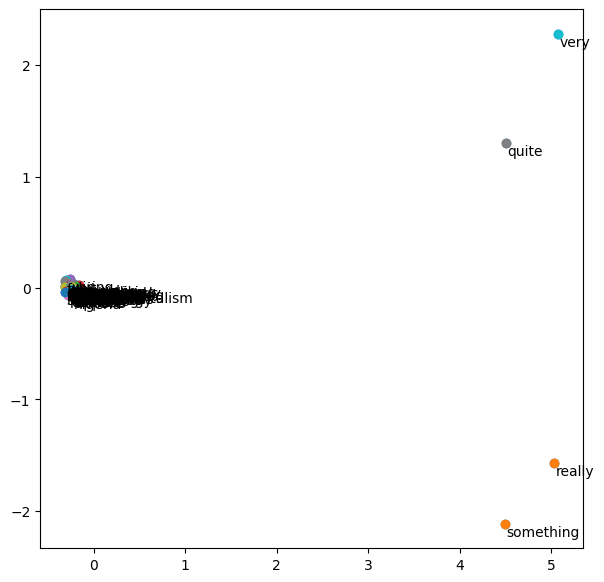

In [ ]:
# Reduce dimensions with PCA
pca = PCA(n_components=0.75)
pca.fit(embeddings)
embeddings_2d = pca.transform(embeddings)

# Plot PC 1 vs. PC 2
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Annotate interesting words
for i, embedding in enumerate(embeddings):
    word = words[i]
    ax.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]),
                xytext=(1, -1), textcoords='offset points', ha='left', va='top')


Most of the words are grouped together in the plot wheras 'really' and 'something' are closer to each other but far from other words. This means they are similar in context. Similarly, 'quite' and 'very' are closer signifying similarity in their meaning. 

Thus, the embneddings from RNN collect the features which represent the meaning of words. These features help with classification and sentiment analysis.